In [108]:
#εισαγωγή βιβλιοθηκών - πακέτων
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
#εισαγωγή του συνόλου δεδομένων
dataset=pd.read_csv("https://media.githubusercontent.com/media/kdemertzis/EKPA/main/Data/Ransomware.csv",sep='|')

In [110]:
#eξερεύνηση συνόλου δεδομένων
dataset

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


In [111]:
#περιγραφικά στατιστικά συνόλου δεδομένων
dataset.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,4.096000e+03,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,4.096000e+03,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


In [112]:
# ανακάτεμα δεδομένων
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,VirusShare_6dfda8fd5c04ee8081aa6219d694f4c4,6dfda8fd5c04ee8081aa6219d694f4c4,332,224,258,12,0,64000,183296,0,...,7,4.243735,2.645763,7.235152,19641.285714,62,132096,72,0,0
1,padrs411.dll,1d519e1486e690ce3961773004afa045,34404,240,8226,9,0,14848,9216,0,...,12,3.803610,2.722921,4.792285,351.166667,38,908,0,16,1
2,VirusShare_64c95a07be357d4855758c2d3995286f,64c95a07be357d4855758c2d3995286f,332,224,271,6,0,23040,265728,8192,...,18,4.133706,2.561934,6.166077,1723.777778,132,9640,0,14,0
3,quartz.dll,82ab148a0e747855f83f332fc83b254f,34404,240,8226,9,0,1224704,539648,0,...,31,2.851065,2.370859,4.545602,1286.838710,34,17188,0,17,1
4,VirusShare_8ed42ce285e6bbbbfc6854c1b838e170,8ed42ce285e6bbbbfc6854c1b838e170,332,224,258,11,0,113664,682496,0,...,7,4.453368,2.623078,7.967002,80992.857143,62,534528,0,0,0


In [113]:
#tαξινόμηση δεδομένων με βάση το εάν είναι νόμιμο ή κακόβουλο λογισμικό
#0 legit, 1 ransomware
dataset.groupby(dataset['legitimate']).size()

legitimate
0    96724
1    41323
dtype: int64

([<matplotlib.patches.Wedge at 0x7d24dadd98a0>,
 [Text(0.6484073958497663, 0.8885763045497695, 'Malware'),
  Text(-0.6484073958497659, -0.8885763045497698, 'Legitimate')],
 [Text(0.35367676137259974, 0.4846779842998742, '30%'),
  Text(-0.35367676137259957, -0.48467798429987435, '70%')])

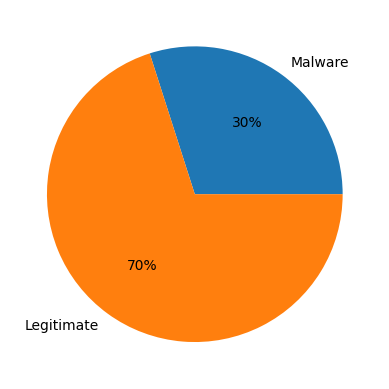

In [114]:
#γραφική απεικόνιση δεδομένων με βάση το εάν είναι νόμιμο ή κακόβουλο λογισμικό#
#0 legit, 1 ransomware
type_classify=['Malware', 'Legitimate']
count_classify=[41323,96724]
plt.pie(count_classify, labels=type_classify, autopct='%0.f%%')

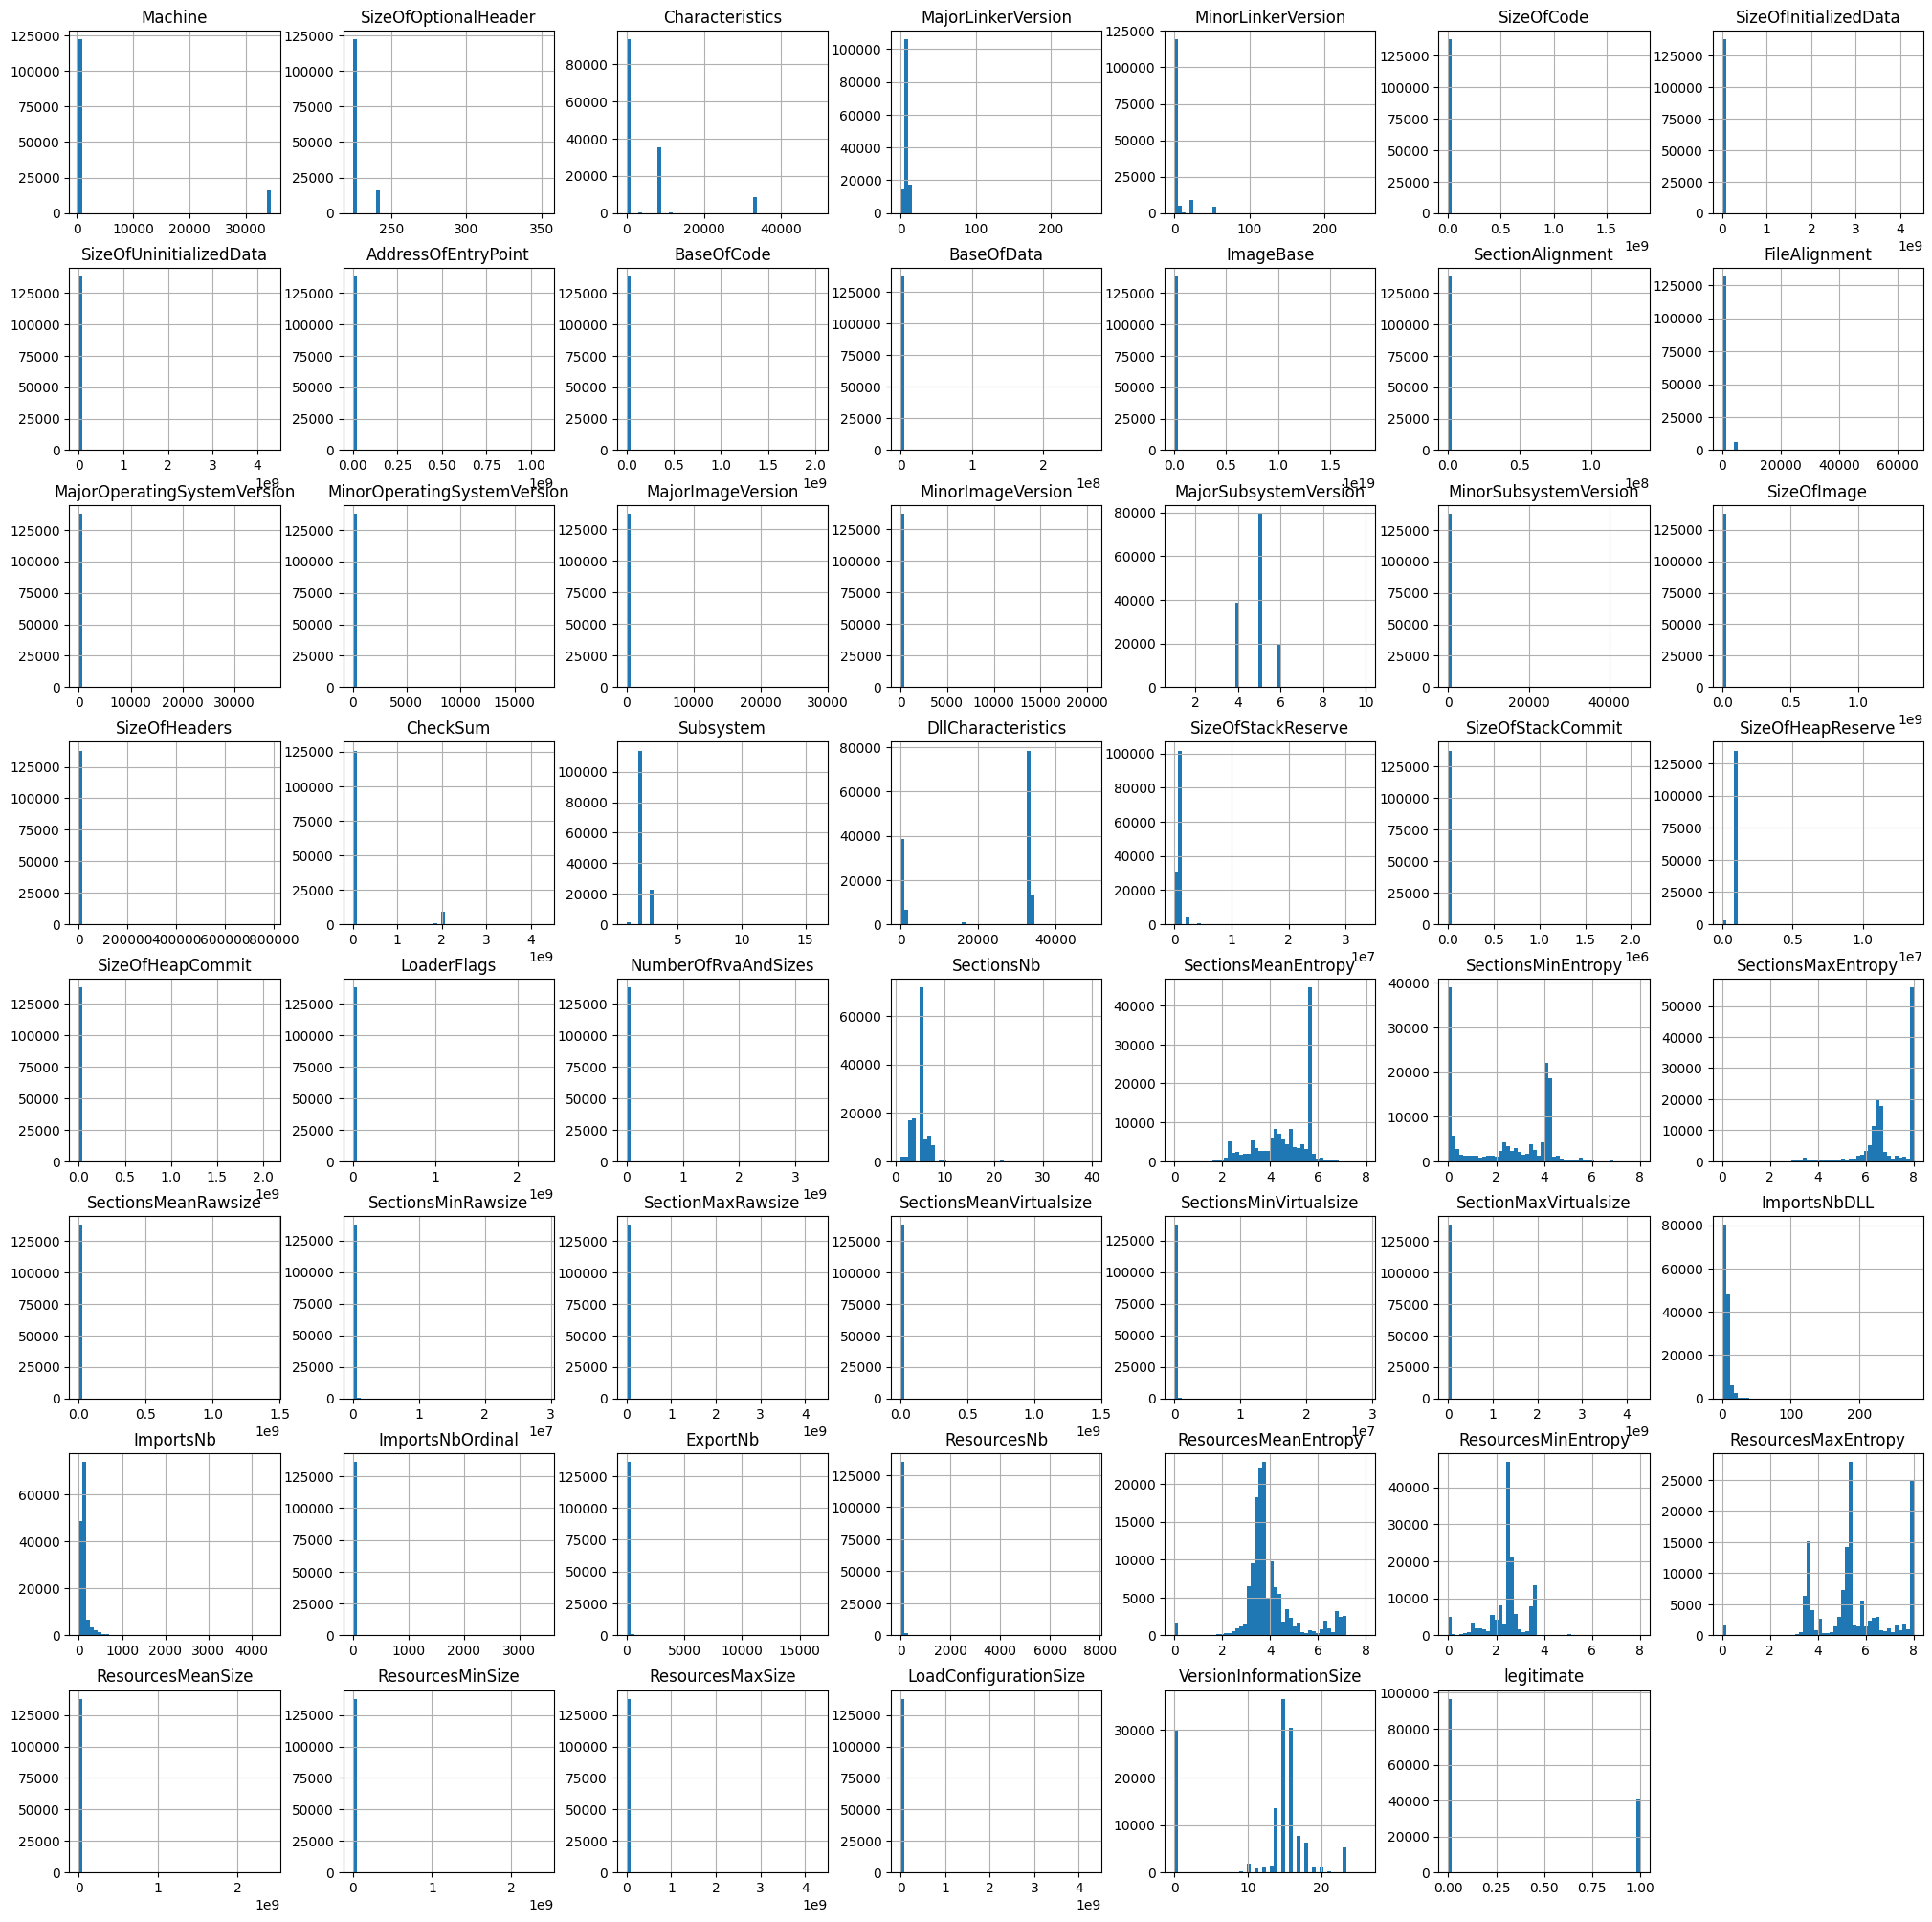

In [115]:
#οπτικοποίηση της κατανομής των δεδομένων
dataset.hist(bins = 50,figsize = (25,25))
plt.show()

<ipython-input-116-88fdfae63182>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr())


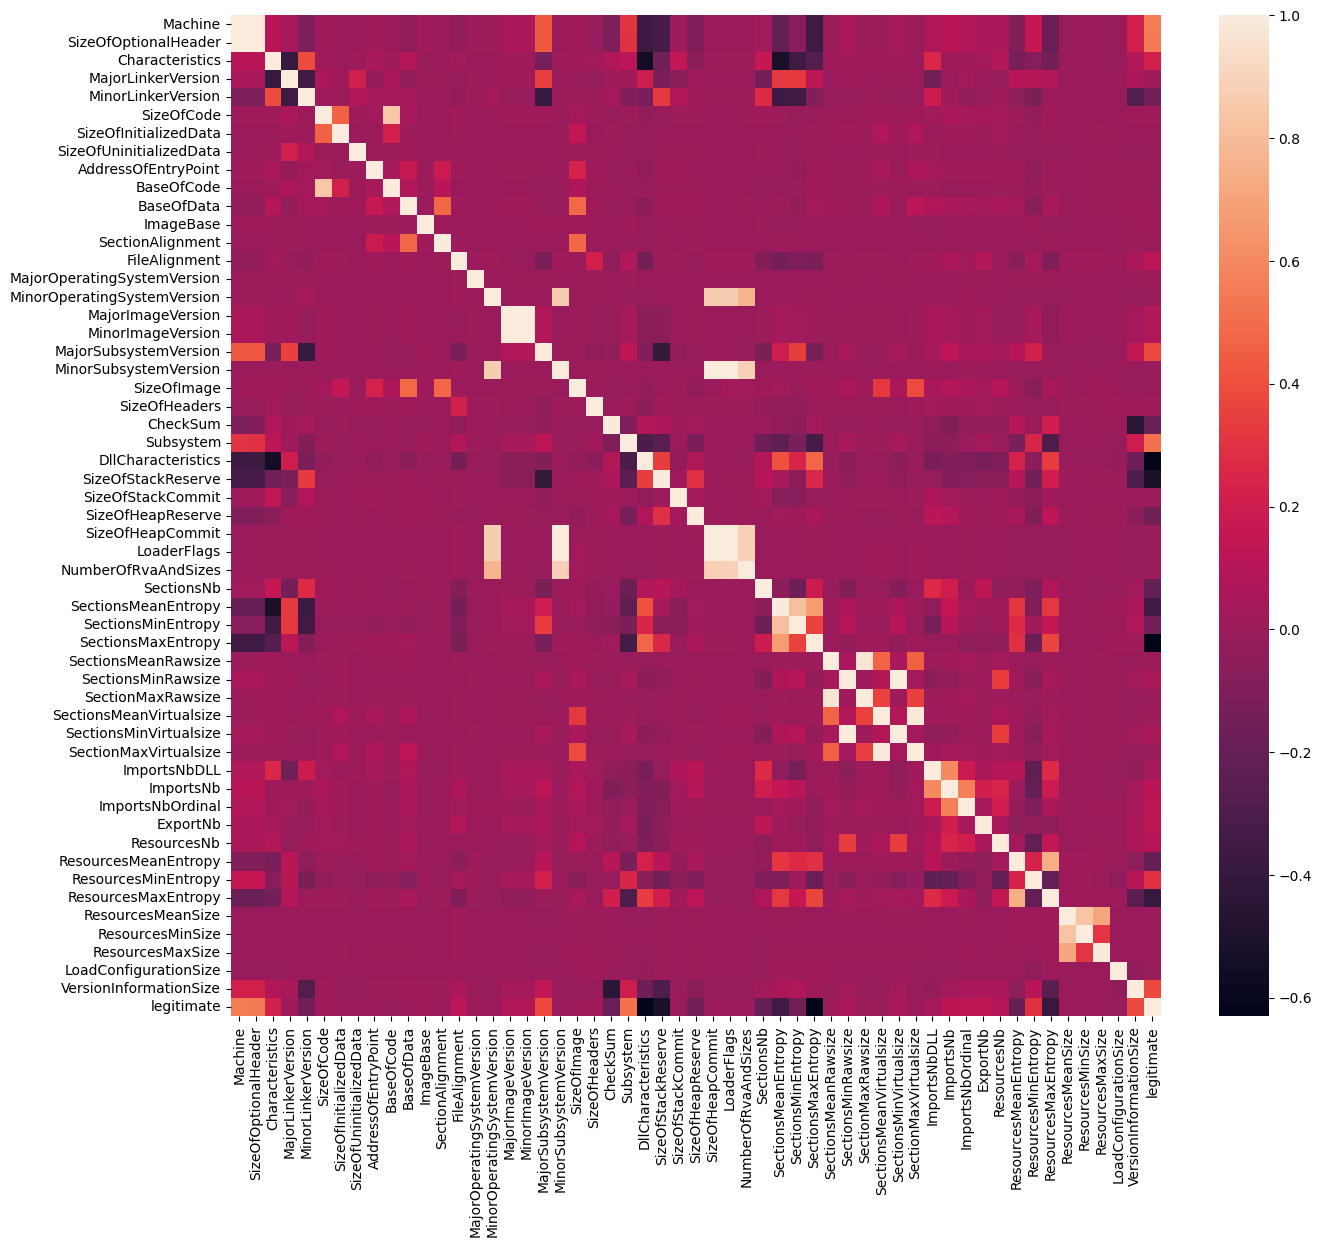

In [116]:
#πίνακας συσχέτισης χαρακτηριστικών του συνόλου δεδομένων
plt.figure(figsize=(15,13))
sns.heatmap(dataset.corr())
plt.show()

In [117]:
#έλεγχος κενών τιμών στα δεδομένα
dataset.isnull().sum()

Name                           0
md5                            0
Machine                        0
SizeOfOptionalHeader           0
Characteristics                0
MajorLinkerVersion             0
MinorLinkerVersion             0
SizeOfCode                     0
SizeOfInitializedData          0
SizeOfUninitializedData        0
AddressOfEntryPoint            0
BaseOfCode                     0
BaseOfData                     0
ImageBase                      0
SectionAlignment               0
FileAlignment                  0
MajorOperatingSystemVersion    0
MinorOperatingSystemVersion    0
MajorImageVersion              0
MinorImageVersion              0
MajorSubsystemVersion          0
MinorSubsystemVersion          0
SizeOfImage                    0
SizeOfHeaders                  0
CheckSum                       0
Subsystem                      0
DllCharacteristics             0
SizeOfStackReserve             0
SizeOfStackCommit              0
SizeOfHeapReserve              0
SizeOfHeap

In [118]:
# Ορισμός X και y
X = dataset.drop('legitimate', axis=1)
y = dataset['legitimate']

In [119]:
# Χειρισμός τιμών που λείπουν με στρατηγική "συμπλήρωση με σταθερή τιμή"
imputer = SimpleImputer(strategy='constant', fill_value='unknown')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
X_imputed

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize
0,VirusShare_6dfda8fd5c04ee8081aa6219d694f4c4,6dfda8fd5c04ee8081aa6219d694f4c4,332,224,258,12,0,64000,183296,0,...,0,7,4.243735,2.645763,7.235152,19641.285714,62,132096,72,0
1,padrs411.dll,1d519e1486e690ce3961773004afa045,34404,240,8226,9,0,14848,9216,0,...,2,12,3.80361,2.722921,4.792285,351.166667,38,908,0,16
2,VirusShare_64c95a07be357d4855758c2d3995286f,64c95a07be357d4855758c2d3995286f,332,224,271,6,0,23040,265728,8192,...,0,18,4.133706,2.561934,6.166077,1723.777778,132,9640,0,14
3,quartz.dll,82ab148a0e747855f83f332fc83b254f,34404,240,8226,9,0,1224704,539648,0,...,8,31,2.851065,2.370859,4.545602,1286.83871,34,17188,0,17
4,VirusShare_8ed42ce285e6bbbbfc6854c1b838e170,8ed42ce285e6bbbbfc6854c1b838e170,332,224,258,11,0,113664,682496,0,...,0,7,4.453368,2.623078,7.967002,80992.857143,62,534528,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,KBDDIV1.DLL,0f1d9fcd2702409d18e18e563a1e2e24,332,224,8450,9,0,0,5632,0,...,1,1,3.582824,3.582824,3.582824,940.0,940,940,0,16
138043,VirusShare_3f80b6fe0752e8db46023cc8940b29ba,3f80b6fe0752e8db46023cc8940b29ba,332,224,258,10,0,119808,385024,0,...,0,6,3.752798,2.458492,5.317552,2738.833333,48,9640,72,15
138044,VirusShare_7aa24d2c113683a3b0d4c6a2eb04625c,7aa24d2c113683a3b0d4c6a2eb04625c,332,224,258,10,0,120320,385024,0,...,0,6,3.729824,2.458492,5.317552,2739.5,48,9640,72,15
138045,VirusShare_644d116adcf5e8d52a905dbb44568703,644d116adcf5e8d52a905dbb44568703,332,224,258,10,0,120320,385024,0,...,0,6,3.729824,2.458492,5.317552,2739.5,48,9640,72,15


In [120]:
# Ορίζουμε ένα LabelEncoder για κάθε στήλη με συμβολοσειρές
label_encoders = {}
for column in X_imputed.select_dtypes(include='object').columns:
    label_encoders[column] = LabelEncoder()
    X_imputed[column] = label_encoders[column].fit_transform(X_imputed[column])

In [121]:
# Δημιουργία του OneClassSVM με προεπιλεγμένες ρυθμίσεις για τον εντοπισμό ακραίων τιμών
outlier_detector = OneClassSVM(nu=0.05)
outliers = outlier_detector.fit_predict(X_imputed)

In [122]:
# Επαναφορά των αρχικών τιμών συμβολοσειρών αν χρειαστεί
for column in X_imputed.select_dtypes(include='object').columns:
    X_imputed[column] = label_encoders[column].inverse_transform(X_imputed[column])

In [123]:
# Εκτύπωση των ακραίων τιμών
print("Ακραίες Τιμές:\n", outliers)

Ακραίες Τιμές:
 [1 1 1 ... 1 1 1]


In [124]:
# Δημιουργία νέου συνόλου δεδομένων μετά την αφαίρεση των ακραίων τιμών
clean_data = pd.DataFrame(X_imputed[outliers != -1])
clean_data['legitimate'] = y[outliers != -1]

In [125]:
# Αναφορά του νέου συνόλου ανά κλάση
remaining_instances_report = clean_data['legitimate'].value_counts()
print("Αναφορά υπολοίπων περιπτώσεων ανά κατηγορία:\n", remaining_instances_report)

Αναφορά υπολοίπων περιπτώσεων ανά κατηγορία:
 0    94376
1    36767
Name: legitimate, dtype: int64


In [126]:
# Εκτύπωση καθαρού συνόλου
clean_data

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,30925,43999,0,0,11,12,0,188,413,0,...,7,33765,3330,20029,13941,55,4547,1,0,0
1,105437,11944,2,2,67,9,0,70,46,0,...,12,27181,3680,13827,556,36,278,0,10,1
2,28873,40478,0,0,18,6,0,94,576,24,...,18,31702,2946,18481,7245,107,2027,0,8,0
3,105665,55894,2,2,67,9,0,2091,1095,0,...,31,2704,2505,13491,5679,32,2492,0,11,1
4,45103,63582,0,0,11,11,0,296,1319,0,...,7,37061,3206,21530,15381,55,5392,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138040,10046,8710,0,0,11,10,0,309,819,0,...,6,25655,2649,16569,9163,44,2027,1,9,0
138043,19848,25442,0,0,11,10,0,308,819,0,...,6,26200,2649,16569,9161,44,2027,1,9,0
138044,35919,51101,0,0,11,10,0,309,819,0,...,6,25655,2649,16569,9163,44,2027,1,9,0
138045,28761,40284,0,0,11,10,0,309,819,0,...,6,25655,2649,16569,9163,44,2027,1,9,0


In [128]:
import ppscore as pps

predictors = pps.predictors(clean_data, 'legitimate')
predictors

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Name,legitimate,0.998602,regression,True,mean absolute error,0.2862,0.000400,DecisionTreeRegressor()
1,Characteristics,legitimate,0.775663,regression,True,mean absolute error,0.2862,0.064205,DecisionTreeRegressor()
2,ResourcesMaxEntropy,legitimate,0.765253,regression,True,mean absolute error,0.2862,0.067185,DecisionTreeRegressor()
3,ImageBase,legitimate,0.757177,regression,True,mean absolute error,0.2862,0.069496,DecisionTreeRegressor()
4,ResourcesMaxSize,legitimate,0.736529,regression,True,mean absolute error,0.2862,0.075405,DecisionTreeRegressor()
5,ResourcesMinEntropy,legitimate,0.716032,regression,True,mean absolute error,0.2862,0.081272,DecisionTreeRegressor()
6,SectionsMinVirtualsize,legitimate,0.681397,regression,True,mean absolute error,0.2862,0.091184,DecisionTreeRegressor()
7,SectionsMinEntropy,legitimate,0.676284,regression,True,mean absolute error,0.2862,0.092647,DecisionTreeRegressor()
8,VersionInformationSize,legitimate,0.675475,regression,True,mean absolute error,0.2862,0.092879,DecisionTreeRegressor()
9,SectionsMaxEntropy,legitimate,0.663002,regression,True,mean absolute error,0.2862,0.096449,DecisionTreeRegressor()


<ipython-input-168-9f91ab22522e>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


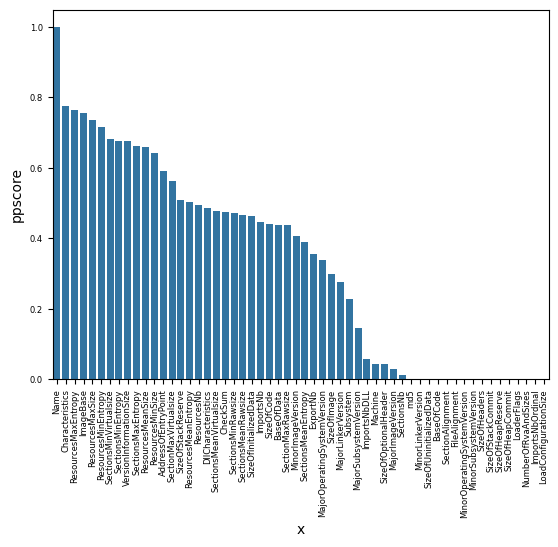

In [168]:
# Plotting the PPS predictors:

ax = sns.barplot(data=predictors, x='x', y='ppscore')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tick_params(axis='both', which='major', labelsize=6)

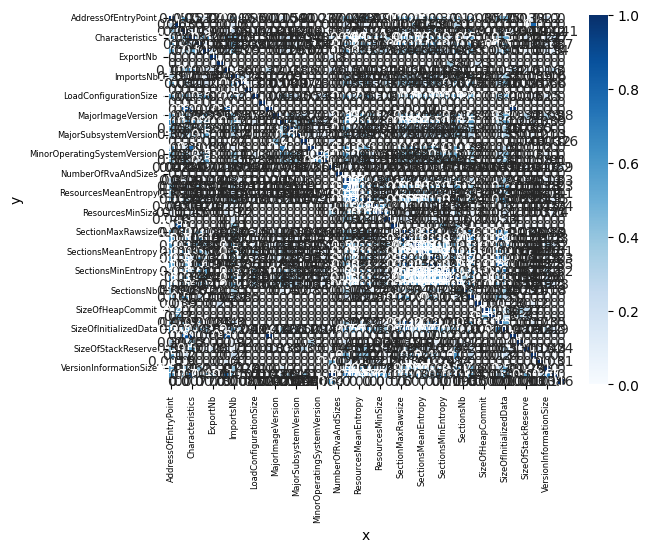

In [176]:
# Plotting the PPS matrix:

matrix = pps.matrix(clean_data)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.tick_params(axis='both', which='major', labelsize=6)

In [177]:
#Apply feature selection based on feature's ppscore being greater than zero

selected_predictors = predictors[predictors["ppscore"] > 0]["x"]
selected_predictors

0                            Name
1                 Characteristics
2             ResourcesMaxEntropy
3                       ImageBase
4                ResourcesMaxSize
5             ResourcesMinEntropy
6          SectionsMinVirtualsize
7              SectionsMinEntropy
8          VersionInformationSize
9              SectionsMaxEntropy
10              ResourcesMeanSize
11               ResourcesMinSize
12            AddressOfEntryPoint
13          SectionMaxVirtualsize
14             SizeOfStackReserve
15           ResourcesMeanEntropy
16                    ResourcesNb
17             DllCharacteristics
18        SectionsMeanVirtualsize
19                       CheckSum
20             SectionsMinRawsize
21            SectionsMeanRawsize
22          SizeOfInitializedData
23                      ImportsNb
24                     SizeOfCode
25                     BaseOfData
26              SectionMaxRawsize
27              MinorImageVersion
28            SectionsMeanEntropy
29            

In [180]:
#Use selected features for training

X_train, X_test, y_train, y_test = train_test_split(clean_data[selected_predictors], clean_data['legitimate'], test_size=0.2, random_state=42)

In [181]:
#κλιμάκωση δεδομένων
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[ 0.01870706,  0.41179984,  0.54771025, ..., -0.34835226,
         1.11078087,  1.14618632],
       [ 0.48484303, -0.71435329,  0.13669471, ..., -0.34835226,
        -0.65640025, -0.01457115],
       [ 1.23334244,  1.19669444, -1.06682719, ...,  2.86994895,
         1.11078087, -1.17532862],
       ...,
       [ 1.16171243, -0.71435329,  0.13669471, ..., -0.34835226,
        -0.65640025, -0.01457115],
       [-0.20392675,  2.11809246,  1.01350198, ..., -0.34835226,
        -0.65640025, -1.17532862],
       [ 0.90670847, -0.47547233, -3.08169689, ..., -0.34835226,
        -0.65640025, -1.17532862]])

In [182]:
#σύγκριση αλγορίθμων: RandomForest, GradientBoosting, AdaBoost
models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

ranking_table_comparison = pd.DataFrame(columns=['Accuracy', 'Recall', 'Precision', 'F1 Score'])

In [183]:
#αξιολόγηση μοντέλων
for model_name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model)

    #αξιολόγηση στο σύνολο δοκιμών
    y_pred = pipeline.fit(X_train_scaled, y_train).predict(X_test_scaled)

    #υπολογισμών μετρικών αξιολόγησης
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    #κατάταξη αποτελεσμάτων αξιολόγησης
    ranking_table_comparison.loc[model_name] = [accuracy, recall, precision, f1]

    #αποτελέσματα αξιολόγησης
    print(f"{model_name} - Αποτελέσματα Κατηγοριοποίησης:\n", classification_report(y_test, y_pred))
    print(f"{model_name} - Πίνακας Συγχυσης:\n", confusion_matrix(y_test, y_pred))
    print()

RandomForest - Αποτελέσματα Κατηγοριοποίησης:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18703
           1       1.00      1.00      1.00      7526

    accuracy                           1.00     26229
   macro avg       1.00      1.00      1.00     26229
weighted avg       1.00      1.00      1.00     26229

RandomForest - Πίνακας Συγχυσης:
 [[18693    10]
 [    0  7526]]

GradientBoosting - Αποτελέσματα Κατηγοριοποίησης:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18703
           1       1.00      1.00      1.00      7526

    accuracy                           1.00     26229
   macro avg       1.00      1.00      1.00     26229
weighted avg       1.00      1.00      1.00     26229

GradientBoosting - Πίνακας Συγχυσης:
 [[18703     0]
 [    0  7526]]

AdaBoost - Αποτελέσματα Κατηγοριοποίησης:
               precision    recall  f1-score   support

           0  

In [184]:
#αποτύπωση αποτελεσμάτων αξιολόγησης
print("Κατάταξη Αποτελεσμάτων:")
print(ranking_table_comparison)

Κατάταξη Αποτελεσμάτων:
                  Accuracy  Recall  Precision  F1 Score
RandomForest      0.999619     1.0   0.998673  0.999336
GradientBoosting  1.000000     1.0   1.000000  1.000000
AdaBoost          1.000000     1.0   1.000000  1.000000
